In [ ]:
!pip install bertopic==0.16.0 datasets==2.16.1 Arabic-Stopwords==0.4.3

In [ ]:
import pandas as pd
import re
import random
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Pre-processing

In [ ]:
def clean_text(text: str):
    if not isinstance(text, str):
        # raise TypeError("text must be a string")
        return ""

    # remove urls
    text = re.sub(r"http\S+", " رابط ", text)

    # replace any digit with رقم
    text = re.sub(r"\d+", " رقم ", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([ w for w in words if len(w) > 1 ] )

    return text.lower().strip()

In [ ]:
raw_dataset_df = pd.read_csv("/content/sample_data/SabaNews.csv")
# raw_dataset_df = raw_dataset_df.sample(frac=1, random_state=101)
raw_dataset_df.shape

(26670, 7)

In [ ]:
raw_dataset_df.head()

,Title,text,Category,Source,date,Time,News_url
0,حقوق الإنسان تدين استمرار الصمت العربي والدولي...,أدانت وزارة حقوق الإنسان بأشد العبارات استمرار...,محلي,صنعاء - سبأ,فبراير 12 2024,21:28:38,https://www.saba.ye/ar/news3304371.htm
1,"اختتام الدورة التدريبية الثالثة ""طوفان الأقصى""...",اختتمت جامعة حجة اليوم الدورة التدريبية الثالث...,محلي,حجة - سبأ,فبراير 12 2024,21:21:57,https://www.saba.ye/ar/news3304368.htm
2,صنعاء.. ورشة ثقافية لتعزيز الهوية الإيمانية لل...,بدأت في مديرية سنحان وبني بهلول بمحافظة صنعاء،...,محلي,صنعاء - سبأ,فبراير 12 2024,21:19:28,https://www.saba.ye/ar/news3304366.htm
3,إب.. تدشين العمل في مشاريع مبادرات مجتمعية بمد...,دشن وكيلا محافظة إب يحيى القاسمي وعبدالرحمن ال...,محلي,إب - سبأ,فبراير 12 2024,21:16:10,https://www.saba.ye/ar/news3304364.htm
4,تفقد أعمال الترميمات في شارع 14 بمركز محافظة ص...,تفقد وكيل محافظة صنعاء للشؤون الفنية المهندس ص...,محلي,صنعاء - سبأ,فبراير 12 2024,20:46:59,https://www.saba.ye/ar/news3304356.htm


In [ ]:
raw_dataset_df['date']=raw_dataset_df['date'].fillna(method='ffill')
raw_dataset_df['Time']=raw_dataset_df['Time'].fillna(method='ffill')
raw_dataset_df['Source']=raw_dataset_df['Source'].fillna('صنعاء - سبأ')

In [ ]:
raw_dataset_df = raw_dataset_df.sample(frac=1, random_state=101)

In [ ]:
raw_dataset_df.head()

,Title,text,Category,Source,date,Time,News_url
22292,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء - سبأ: في مثل هذا اليوم 11 فبراير شن طير...,اقتصاد,صنعاء - سبأ,فبراير 28 2022,12:43:33,https://www.saba.ye/ar/news3303838.htm
2092,فعاليتان في ريمة بذكرى سنوية الشهيد القائد,نُظمت بمحافظة ريمة اليوم فعاليتان ثقافيتان بال...,محلي,ريمة - سبأ,فبراير 07 2024,17:19:58,https://www.saba.ye/ar/news3302783.htm
11742,اختتام منافسات البطولة الشاطئية الأولى للفروسي...,اختتمت مساء اليوم على شاطئ مدينة الحديدة منافس...,رياضة,الحديدة - سبأ,فبراير 18 2023,21:06:38,https://www.saba.ye/ar/news3224736.htm
7922,اختتام المسابقات المنهجية العلمية لطلاب الثانو...,اختتمت بأمانة العاصمة اليوم، المسابقات المنهجي...,محلي,صنعاء - سبأ,يناير 28 2024,19:27:02,https://www.saba.ye/ar/news3300061.htm
23343,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء - سبأ: في مثل هذا اليوم 10 فبراير استشهد...,محلي,صنعاء - سبأ,ديسمبر 29 2023,16:31:27,https://www.saba.ye/ar/news3303502.htm


In [ ]:
raw_dataset_df['text'] = raw_dataset_df['text'].apply(clean_text)

In [ ]:
raw_dataset_df['text_len'] = raw_dataset_df['text'].apply(len)

In [ ]:
raw_dataset_df.head(2)

,Title,text,Category,Source,date,Time,News_url,text_len
22292,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء سبأ في مثل هذا اليوم رقم فبراير شن طيران...,اقتصاد,صنعاء - سبأ,فبراير 28 2022,12:43:33,https://www.saba.ye/ar/news3303838.htm,6341
2092,فعاليتان في ريمة بذكرى سنوية الشهيد القائد,ظمت بمحافظة ريمة اليوم فعاليتان ثقافيتان بالذك...,محلي,ريمة - سبأ,فبراير 07 2024,17:19:58,https://www.saba.ye/ar/news3302783.htm,747


<Axes: xlabel='text_len', ylabel='Count'>

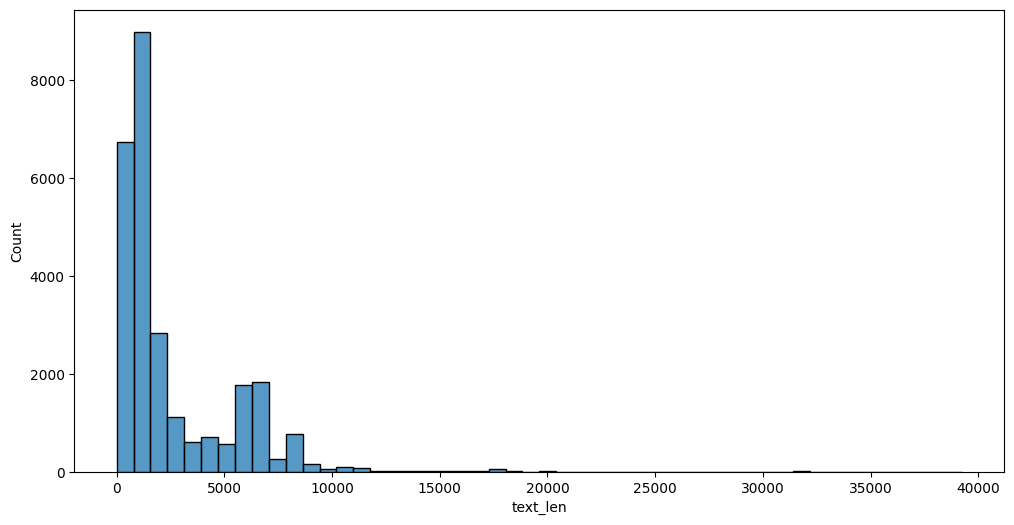

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(raw_dataset_df['text_len'], bins=50)

In [ ]:
print(raw_dataset_df.shape)
raw_dataset_df = raw_dataset_df[ raw_dataset_df['text_len'] <= 10_000 ]
print(raw_dataset_df.shape)

(26670, 8)
(26361, 8)


In [ ]:
print(raw_dataset_df.shape)
raw_dataset_df.drop_duplicates(['text'], inplace=True)
print(raw_dataset_df.shape)

(26361, 8)
(14284, 8)


In [ ]:
import calendar
import locale
def parse_arabic_date(arabic_date):
    # Set the locale to an Arabic locale
    # locale.setlocale(locale.LC_TIME, 'ar')
    locale.setlocale(locale.LC_TIME, 'ar_YE.utf8')
    # Check if the value is a string
    if isinstance(arabic_date, str):
        try:
            # Attempt to parse with the Arabic format
            pattern = "%B %d %Y"
            parsed_date = datetime.strptime(arabic_date, pattern)
        except ValueError:
            # If parsing fails, assume the month is already in numerical format
            pattern = "%m %d %Y"
            parsed_date = datetime.strptime(arabic_date, pattern)
    else:
        # If the value is not a string, return None or handle as needed
        parsed_date = None

    return parsed_date

In [ ]:
# Apply the function to the DataFrame column
raw_dataset_df['ParsedDate'] = raw_dataset_df['date'].apply(parse_arabic_date)

In [ ]:
raw_dataset_df.head(2)

,Title,text,Category,Source,date,Time,News_url,text_len,ParsedDate
22292,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء سبأ في مثل هذا اليوم رقم فبراير شن طيران...,اقتصاد,صنعاء - سبأ,فبراير 28 2022,12:43:33,https://www.saba.ye/ar/news3303838.htm,6341,2022-02-28
2092,فعاليتان في ريمة بذكرى سنوية الشهيد القائد,ظمت بمحافظة ريمة اليوم فعاليتان ثقافيتان بالذك...,محلي,ريمة - سبأ,فبراير 07 2024,17:19:58,https://www.saba.ye/ar/news3302783.htm,747,2024-02-07


## Embedding

In [ ]:
from sentence_transformers import SentenceTransformer

# model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"
model_id = "sentence-transformers/LaBSE"
embedding_model = SentenceTransformer(model_id,device="cuda:0")

In [ ]:
news_embeddings = embedding_model.encode(raw_dataset_df['text'].values, show_progress_bar=True)

Batches:   0%|          | 0/447 [00:00<?, ?it/s]

In [ ]:
news_embeddings.shape

(14284, 768)

## Dim Reduction

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=15,
                  min_dist=0.0, metric='cosine',
                  random_state=101)

## Clustering

In [ ]:
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.

hdbscan_model = HDBSCAN(min_cluster_size=50,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

## Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(min_df=3,
                                   stop_words=stop_words,
                                   analyzer='word',
                                   max_df=0.5,
                                   ngram_range=(1, 3)
                                   )

## Topic Representer

In [ ]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

## Let's Go With Saba News Topics modeling

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=10,
    verbose=True
)

topics, probs =  topic_model.fit_transform(
    raw_dataset_df['text'].values,
    news_embeddings
)

2024-02-14 02:49:12,953 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-14 02:50:03,304 - BERTopic - Dimensionality - Completed ✓
2024-02-14 02:50:03,307 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-14 02:50:04,745 - BERTopic - Cluster - Completed ✓
2024-02-14 02:50:04,754 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-14 02:50:38,367 - BERTopic - Representation - Completed ✓


In [ ]:
print(
    raw_dataset_df['text'].values[50],
    topics[50], probs[50]
)

topic_model.get_topic(17)

ناقش اجتماع موسع اليوم برئاسة محافظ مأرب علي محمد طعيمان مستوى تنفيذ أنشطة ومشاريع الخطة الزراعية للعام رقم هـ تنفيذا لموجهات قائد الثورة ورئيس المجلس السياسي الأعلى واستعرض الاجتماع بحضور وكيل المحافظة عبدالله الشريف مهام واختصاصات الجهات والمؤسسات الزراعية وآلية التنسيق بينها واحتياجاتها والصعوبات التي تواجه سير عملها وفي الاجتماع الذي حضره رئيس اللجنة الزراعية بالمحافظة دارس المعوضي ومدراء وحدة تمويلات اللجنة الزراعية العليا محمد الهادي ومكتب الزراعة فارس القانصي ووحدة تمويل المشاريع الزراعية محمد ذياب أكد المحافظ طعيمان أهمية التسريع في تنفيذ المشاريع الزراعية وفق الخطة المعدة وبما يسهم في تنشيط الوضع الزراعي بالمحافظة وشدد على أهمية وضع آلية للتنسيق بين مكتب الزراعة واللجنة الزراعية ووحدة تمويل المشاريع بالمحافظة وعقد اجتماعات شهرية والرفع بتقارير عن مستوى الأداء وبما يسهم في منع التداخل في المهام والارتقاء بمستوى الأداء في الجانب الزراعي وأقر الاجتماع عدد من الإجراءات والمعالجات الخاصة بتنفيذ المشاريع الزراعية المدرجة ضمن خطة العام الجاري وعقد الاجتماعات الدورية ودعم المبادرات ال

[('اللبنانية', 0.06297809240607727),
 ('حزب الله', 0.056079567392977904),
 ('حزب', 0.05367307100810857),
 ('بالأسلحة', 0.05307977070447432),
 ('المقاومة الإسلامية', 0.052989846799886525),
 ('بلدة', 0.041045124159964634),
 ('بالأسلحة المناسبة', 0.03928327694035778),
 ('إصابات', 0.03913569259991424),
 ('الإسلامية لبنان', 0.03762803775328998),
 ('المقاومة الإسلامية لبنان', 0.036739959979359846)]

In [ ]:
raw_dataset_df['topic'] = topics
raw_dataset_df['prob'] = probs

In [ ]:
raw_dataset_df.head(5)

,Title,text,Category,Source,date,Time,News_url,text_len,ParsedDate,topic,prob
22292,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء سبأ في مثل هذا اليوم رقم فبراير شن طيران...,اقتصاد,صنعاء - سبأ,فبراير 28 2022,12:43:33,https://www.saba.ye/ar/news3303838.htm,6341,2022-02-28,41,1.000000
2092,فعاليتان في ريمة بذكرى سنوية الشهيد القائد,ظمت بمحافظة ريمة اليوم فعاليتان ثقافيتان بالذك...,محلي,ريمة - سبأ,فبراير 07 2024,17:19:58,https://www.saba.ye/ar/news3302783.htm,747,2024-02-07,10,0.759347
11742,اختتام منافسات البطولة الشاطئية الأولى للفروسي...,اختتمت مساء اليوم على شاطئ مدينة الحديدة منافس...,رياضة,الحديدة - سبأ,فبراير 18 2023,21:06:38,https://www.saba.ye/ar/news3224736.htm,2928,2023-02-18,2,1.000000
7922,اختتام المسابقات المنهجية العلمية لطلاب الثانو...,اختتمت بأمانة العاصمة اليوم المسابقات المنهجية...,محلي,صنعاء - سبأ,يناير 28 2024,19:27:02,https://www.saba.ye/ar/news3300061.htm,1161,2024-01-28,2,0.632251
23343,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء سبأ في مثل هذا اليوم رقم فبراير استشهد و...,محلي,صنعاء - سبأ,ديسمبر 29 2023,16:31:27,https://www.saba.ye/ar/news3303502.htm,6841,2023-12-29,41,1.000000


In [ ]:
topic_model.get_topic(0)

[('الاحتلال', 0.020650779596264872),
 ('قوات', 0.015833237393169865),
 ('القدس', 0.012904531196351864),
 ('الصهيونية', 0.012638112680564343),
 ('قوات العدو', 0.011689899943638135),
 ('الفلسطينيين', 0.011444527192673687),
 ('الضفة', 0.010553868181297646),
 ('جيش', 0.010159711219043818),
 ('حماس', 0.009907382828599452),
 ('الشعب الفلسطيني', 0.0097855912077403)]

In [ ]:
raw_dataset_df[ raw_dataset_df['topic'] == 4 ].head(10)

,Title,text,Category,Source,date,Time,News_url,text_len,ParsedDate,topic,prob
20814,مسيرة حاشدة في المربع الغربي بإب نصرة للشعب ال...,إب سبأ أحتشد أبناء المربع الغربي بمحافظة إب مد...,محلي,صنعاء - سبأ,ديسمبر 30 2023,19:17:19,https://www.saba.ye/ar/news3292179.htm,1315,2023-12-30,4,0.918821
8051,أبناء الحديدة يحتشدون في أربع مسيرات للتأكيد ع...,الحديدة سبأ احتشد الآلاف من أبناء محافظة الحدي...,محلي,صنعاء - سبأ,يناير 26 2024,17:06:00,https://www.saba.ye/ar/news3299476.htm,5161,2024-01-26,4,0.739048
6200,وقفة قبيلة بالبيضاء تضامنا من الشعب والمقاومة ...,البيضاء سبأ نظم أبناء وقبائل مديرية ريف البيضا...,محلي,صنعاء - سبأ,فبراير 01 2024,17:21:51,https://www.saba.ye/ar/news3301076.htm,2507,2024-02-01,4,0.785658
7563,وقفة في مربع مدينة بيت الفقية بالحديدة تضامنا ...,نظم أبناء منطقة السعادية بمربع مدينة بيت الفقي...,محلي,الحديدة - سبأ,يناير 30 2024,16:32:10,https://www.saba.ye/ar/news3300531.htm,1080,2024-01-30,4,0.989261
6325,وقفة لموظفي صندوق النظافة في البيضاء تنديدا بج...,نظم موظفو مكتب النظافة والتحسين بمحافظة البيضا...,محلي,البيضاء - سبأ,يناير 30 2024,17:29:59,https://www.saba.ye/ar/news3300564.htm,940,2024-01-30,4,0.973754
714,ذمار.. مسيرات ووقفات تأكيدا على مساندة أبناء غزة,شهدت مديريات عتمة وجبل الشرق ووصاب السافل ووصا...,محلي,ذمار - سبأ,فبراير 09 2024,20:14:37,https://www.saba.ye/ar/news3303448.htm,1768,2024-02-09,4,0.872858
8037,مسيرات في مديريات ذمار تأكيدا على واحدية المعر...,ذمار سبأ شهدت مديريات ضوران آنس وجبل الشرق وصا...,محلي,صنعاء - سبأ,يناير 26 2024,19:00:48,https://www.saba.ye/ar/news3299529.htm,1819,2024-01-26,4,0.808967
9463,وقفة بمديرية القبيطة في لحج تنديداً بجرائم الع...,نظمت السلطة المحلية بمحافظة لحج بالتنسيق مع ال...,محلي,لحج - سبأ,يناير 23 2024,08:49:35,https://www.saba.ye/ar/news3298620.htm,1001,2024-01-23,4,0.903398
7631,وقفة لقيادة وموظفي الضرائب بالحديدة تنديدا بجر...,نظمت قيادة وموظفو مكتب الضرائب الوحدة التنفيذي...,محلي,الحديدة - سبأ,يناير 29 2024,15:19:52,https://www.saba.ye/ar/news3300249.htm,1989,2024-01-29,4,0.751865
23364,لقاءات قبلية في مديريات ذمار والحداء وميفعة عن...,نظم أبناء مديريات ذمار والحداء وميفعة عنس لقاء...,محلي,ذمار - سبأ,ديسمبر 28 2023,20:26:12,https://www.saba.ye/ar/news3291693.htm,1859,2023-12-28,4,0.717487


In [ ]:
raw_dataset_df[ raw_dataset_df['topic'] == 0 ].head(10)

,Title,text,Category,Source,date,Time,News_url,text_len,ParsedDate,topic,prob
10430,اختتام الأيام الحقلية الخاصة بنشر الأصناف المح...,اختتمت الادارة العامة للإرشاد والإعلام الزراعي...,الزراعة,الجوف - سبأ,مارس 07 2023,16:19:45,https://www.saba.ye/ar/news3227627.htm,1847,2023-03-07,0,1.0
22235,وضع حجر الأساس إنشاء جسر المدخل الشرقي لمطار ص...,وضع وزير النقل في حكومة تصريف الأعمال عبدالوها...,التنمية والمبادرات المجتمعية,صنعاء - سبأ,أكتوبر 24 2023,19:51:04,https://www.saba.ye/ar/news3274859.htm,1612,2023-10-24,0,1.0
19130,توقيع وإشهار مشروع سد مبارك المائي بمديرية الس...,أقيمت في مديرية السياني بمحافظة إب فعالية توقي...,التنمية والمبادرات المجتمعية,إب - سبأ,أكتوبر 19 2023,22:26:11,https://www.saba.ye/ar/news3273567.htm,1316,2023-10-19,0,1.0
2720,الرئيس المشاط يفتتح ويضع حجر الأساس لـ 235 مشر...,قام فخامة المشير الركن مهدي المشاط رئيس المجلس...,التنمية والمبادرات المجتمعية,تعز - سبأ,أكتوبر 16 2023,17:12:14,https://www.saba.ye/ar/news3272470.htm,3093,2023-10-16,0,1.0
6798,تدشين موسم التشجير 1444هـ في البيضاء,دشن محافظ البيضاء عبدالله إدريس اليوم موسم الت...,الزراعة,البيضاء - سبأ,مارس 03 2023,17:24:08,https://www.saba.ye/ar/news3226985.htm,1265,2023-03-03,0,1.0
10619,رئيس الوزراء يغرس عدداً من الأشجار بإدارة الرق...,صنعاء سبأ قام رئيس مجلس الوزراء الدكتور عبدالع...,الزراعة,صنعاء - سبأ,مارس 01 2023,18:48:05,https://www.saba.ye/ar/news3226726.htm,2578,2023-03-01,0,1.0
12349,مؤسسة الغزل والنسيج تعلن أسعار شراء القطن الخام,أعلنت المؤسسة العامة لصناعة الغزل والنسيج اليو...,محلي,صنعاء - سبأ,يناير 15 2024,21:39:22,https://www.saba.ye/ar/news3296658.htm,439,2024-01-15,0,1.0
19441,وكيل أول الحديدة يتفقد مشاريع مبادرات مجتمعية ...,تفقد وكيل أول محافظة الحديدة أحمد البشري اليوم...,التنمية والمبادرات المجتمعية,الحديدة - سبأ,أكتوبر 22 2023,18:12:16,https://www.saba.ye/ar/news3274271.htm,761,2023-10-22,0,1.0
340,محافظ حجة يطلع على مستوى تنفيذ مشاريع الطرق في...,اطلع محافظ حجة هلال الصوفي اليوم على مستوى تنف...,التنمية والمبادرات المجتمعية,حجة - سبأ,يناير 18 2024,18:33:07,https://www.saba.ye/ar/news3297488.htm,2902,2024-01-18,0,1.0
2791,ورشة تعريفية ببرنامج العمل التنموي والمجتمعي ف...,قدت بمديرية الحشاء محافظة الضالع ورشة تعريفية ...,التنمية والمبادرات المجتمعية,الضالع - سبأ,أكتوبر 16 2023,14:46:03,https://www.saba.ye/ar/news3272429.htm,1216,2023-10-16,0,1.0


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,2196,-1_الضفة_الأسرى_البحر الأحمر_الثورة,"[الضفة, الأسرى, البحر الأحمر, الثورة, الشعب ال...","[كيان العدو الصهيوني, نتنياهو, المقاومة الفلسط...",[الحديدة سبأ شهدت مدينة الحديدة اليوم طوفانا ب...
1,0,1821,0_الزراعية_المحافظة_المشاريع_الزراعة,"[الزراعية, المحافظة, المشاريع, الزراعة, الزراع...","[الزراعة والري, اللجنة الزراعية, الزراعية والس...",[ناقش اجتماع اليوم برئاسة محافظ مأرب علي طعيما...
2,1,1134,1_الغاز_رقم مليار_النفط_أسعار,"[الغاز, رقم مليار, النفط, أسعار, بنسبة رقم, ال...","[الغاز أوروبا, أسعار الغاز, الغاز, الغاز الطبي...",[بروكسل سبأ تراجعت أسعار الغاز في أوروبا اليوم...
3,2,977,2_البطولة_والرياضة_الشباب والرياضة_الرياضية,"[البطولة, والرياضة, الشباب والرياضة, الرياضية,...","[الشباب والرياضة بالمحافظة, والرياضة بالمحافظة...",[انطلقت على صالة كلية التربية البدنية بجامعة ا...
4,3,973,3_الفضاء_كورونا_الدراسة_القمر,"[الفضاء, كورونا, الدراسة, القمر, الباحثون, الص...","[فيروس كورونا, بفيروس كورونا, الفيروس, الوباء,...",[وكالات سبأ تقرير نسيم الرضاءتجاهل العلماء توح...
5,4,466,4_المشاركون_الشعب اليمني_الوقفة_السفن,"[المشاركون, الشعب اليمني, الوقفة, السفن, الأمر...","[والمقاومة الفلسطينية, العدوان الأمريكي البريط...",[الحديدة سبأ شهدت مديرية الصليف بمحافظة الحديد...
6,5,464,5_رقم دولار_رقم رقم دولار_الذهب_المائة رقم,"[رقم دولار, رقم رقم دولار, الذهب, المائة رقم, ...","[أسعار الذهب, سعر الذهب, دولار للأونصة, رقم دو...",[ارتفعت أسعار الذهب اليوم الأربعاء مدعومة بتصا...
7,6,363,6_الزلزال_الحادث_رقم شخصا_ضرب,"[الزلزال, الحادث, رقم شخصا, ضرب, أشخاص, رقم در...","[زلزال, الزلازل, مقياس ريختر, اليابان, الزلزال...",[أعلنت بعثة رصد الزلازل التابعة لوزارة الطوارئ...
8,7,330,7_المنتخب_منتخب_الدقيقة_كأس,"[المنتخب, منتخب, الدقيقة, كأس, الدقيقة رقم, ال...","[بنتيجة رقم رقم, كأس آسيا, بنتيجة رقم, المركز ...",[حقق المنتخب الوطني العراقي اليوم الاثنين فوزا...
9,8,329,8_قوات العدو_اقتحمت_بلدة_قوات العدو الصهيوني,"[قوات العدو, اقتحمت, بلدة, قوات العدو الصهيوني...","[اعتقلت قوات العدو, العدو الصهيوني فجر, قوات ا...",[شن قوات العدو الصهيوني فجر اليوم الأحد حملة ا...


In [ ]:
topic_model.visualize_topics()

In [ ]:
raw_dataset_df['text'].values[20]

'في مثل هذا اليوم رقم فبراير شن طيران العدوان الأمريكي السعودي الإماراتي عشرات الغارات على المحافظات ما أدى إلى استشهاد وإصابة مدنيين وتضرر وتدمير الممتلكات العامة والخاصة ففي رقم فبراير رقم شن طيران العدوان رقم غارة على مناطق بران والدجرين وضبوعة ومسورة وخمس غارات على مناطق ملح وضبوعة وبني شكوان وجبل المدفون بمديرية نهم في محافظة صنعاء ما أدى إلى أضرار بليغة في الأراضي الزراعية ومنازل المواطنين طيران العدوان استهدف قرية آل حزيم في محافظة مأرب والسلسلة الجبلية ومفرق العمري في مديرية ذوباب بمحافظة تعز وشن سلسلة غارات على مديرية الضحي والمكتب السياسي بالحي التجاري بمديرية الميناء في محافظة الحديدة كما شنت طائرة بدون طيار عدة غارات على مديرية الغيل في محافظة الجوف وفي مثل هذا اليوم من العام رقم استشهد ثلاثة أطفال وأصيب آخرون في غارة شنها طيران العدوان على منزلهم في مديرية باقم بمحافظة صعدة وشن الطيران المعادي ست غارات على مديرية بلاد الروس وخمس غارات على مديرية نهم بمحافظة صنعاء أسفرت عن أضرار بليغة في منازل المواطنين وممتلكاتهم وشنت طائرة بدون طيار تابعة للعدوان غارتين على مديرية صرواح ب

In [ ]:
topics[20],probs[20]

(41, 0.9812113169773029)

In [ ]:
topic_model.get_topic(-1)

[('الضفة', 0.00412570244155032),
 ('الأسرى', 0.003532744096201507),
 ('البحر الأحمر', 0.0033302992892068773),
 ('الثورة', 0.00330485736968528),
 ('الشعب اليمني', 0.003120746338146882),
 ('الصين', 0.002983198962964085),
 ('إيران', 0.002963463302570858),
 ('الضفة الغربية', 0.002934774393345631),
 ('الأمة', 0.0028847531621636713),
 ('المقاومة الفلسطينية', 0.002825751954915404)]

In [ ]:
topic_model.get_topic(27)

[('المقاومة الإسلامية العراق', 0.0574919932803765),
 ('الإسلامية العراق', 0.05702136511707339),
 ('قاعدة', 0.0522413039281143),
 ('سوريا', 0.05121215301110228),
 ('العراقية', 0.04971386478457084),
 ('المقاومة الإسلامية', 0.0482194489937015),
 ('المقاومة العراقية', 0.0427141079640441),
 ('الاحتلال الأمريكي', 0.041848557121271106),
 ('القوات الأمريكية', 0.035093880630117466),
 ('القاعدة', 0.02824284790829155)]

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topics_per_class = topic_model.topics_per_class(
    raw_dataset_df['text'].values,
    classes=raw_dataset_df['Source'].values,
)

856it [02:11,  6.51it/s]


In [ ]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=20)

In [ ]:
topics_over_time = topic_model.topics_over_time(
    raw_dataset_df['text'].values,
    raw_dataset_df['ParsedDate'].values
)

2024-02-14 03:06:15,700 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 1353) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 
1353it [05:35,  4.03it/s]


In [ ]:
topic_model.visualize_topics_over_time(
    topics_over_time,
    topics=[10, -1, 12, 27, 4, 3, 30, 17, 4, 10]
)

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)

100%|██████████| 46/46 [00:00<00:00, 63.82it/s]


In [ ]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

## Topics Merging

In [ ]:
topics_to_merge = [
    [17, 23, 46],
    [27, 10, 42]
]

topic_model.merge_topics(
    raw_dataset_df['text'].values,
    topics_to_merge
)

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)

topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

100%|██████████| 40/40 [00:00<00:00, 96.35it/s] 


## Topics Filtering

In [ ]:
raw_dataset_df.head()

,Title,text,Category,Source,date,Time,News_url,text_len,ParsedDate,topic,prob
22292,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء سبأ في مثل هذا اليوم رقم فبراير شن طيران...,اقتصاد,صنعاء - سبأ,فبراير 28 2022,12:43:33,https://www.saba.ye/ar/news3303838.htm,6341,2022-02-28,41,1.000000
2092,فعاليتان في ريمة بذكرى سنوية الشهيد القائد,ظمت بمحافظة ريمة اليوم فعاليتان ثقافيتان بالذك...,محلي,ريمة - سبأ,فبراير 07 2024,17:19:58,https://www.saba.ye/ar/news3302783.htm,747,2024-02-07,10,0.759347
11742,اختتام منافسات البطولة الشاطئية الأولى للفروسي...,اختتمت مساء اليوم على شاطئ مدينة الحديدة منافس...,رياضة,الحديدة - سبأ,فبراير 18 2023,21:06:38,https://www.saba.ye/ar/news3224736.htm,2928,2023-02-18,2,1.000000
7922,اختتام المسابقات المنهجية العلمية لطلاب الثانو...,اختتمت بأمانة العاصمة اليوم المسابقات المنهجية...,محلي,صنعاء - سبأ,يناير 28 2024,19:27:02,https://www.saba.ye/ar/news3300061.htm,1161,2024-01-28,2,0.632251
23343,جرائم العدوان الأمريكي السعودي في مثل هذا اليو...,صنعاء سبأ في مثل هذا اليوم رقم فبراير استشهد و...,محلي,صنعاء - سبأ,ديسمبر 29 2023,16:31:27,https://www.saba.ye/ar/news3303502.htm,6841,2023-12-29,41,1.000000


In [ ]:
filtered_raw_dataset_df = raw_dataset_df[ ~raw_dataset_df['topic'].isin([-1]) ]

## Inference

In [ ]:
news = """أدانت وزارة الخارجية الصمت الدولي تجاه جرائم الحرب والإبادة الجماعية التي يرتكبها العدو الصهيوني بحق أبناء الشعب الفلسطيني في غزة المتصاعدة يومياً وآخرها التهديد بارتكاب مجزرة بحق النازحين في مدينة رفح."""

_topic, _prob =  topic_model.transform([news])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-14 03:31:54,238 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-14 03:31:54,953 - BERTopic - Dimensionality - Completed ✓
2024-02-14 03:31:54,954 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-14 03:31:54,957 - BERTopic - Cluster - Completed ✓


In [ ]:
_topic, _prob

([4], array([0.8006731]))

In [ ]:
topic_model.get_topic(_topic[0])

[('المشاركون', 0.013562462908614393),
 ('الشعب اليمني', 0.013438533534183717),
 ('الوقفة', 0.011481890412720665),
 ('السفن', 0.010020175828229803),
 ('الأمريكي البريطاني', 0.00987392655996093),
 ('نصرة', 0.009775286803322188),
 ('القوات المسلحة', 0.009560930807256899),
 ('الإبادة', 0.009096383670417792),
 ('الإسرائيلية', 0.008301118577071623),
 ('الثورة', 0.008294328607526564)]

In [ ]:
news2="""شن العدوان الأمريكي البريطاني، مساء اليوم غارة على محافظة الحديدة"""
_topic2, _prob2 =  topic_model.transform([news2])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-14 03:34:43,229 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-14 03:34:44,069 - BERTopic - Dimensionality - Completed ✓
2024-02-14 03:34:44,071 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-14 03:34:44,074 - BERTopic - Cluster - Completed ✓


In [ ]:
_topic2, _prob2

([-1], array([0.]))

In [ ]:
topic_model.get_topic(_topic2[0])

[('الضفة', 0.004343668102638323),
 ('الأسرى', 0.0037121210900895596),
 ('البحر الأحمر', 0.0035071084654584883),
 ('الثورة', 0.0034955357464768284),
 ('الشعب اليمني', 0.0033010441829671036),
 ('الصين', 0.003153209194073598),
 ('إيران', 0.0031237216091687227),
 ('الضفة الغربية', 0.003083966279071822),
 ('الأمة', 0.0030507870159163556),
 ('المقاومة الفلسطينية', 0.0029741625519166203)]

In [ ]:
filtered_raw_dataset_df[ filtered_raw_dataset_df['topic'] == _topic[0] ].head()

,Title,text,Category,Source,date,Time,News_url,text_len,ParsedDate,topic,prob
20814,مسيرة حاشدة في المربع الغربي بإب نصرة للشعب ال...,إب سبأ أحتشد أبناء المربع الغربي بمحافظة إب مد...,محلي,صنعاء - سبأ,ديسمبر 30 2023,19:17:19,https://www.saba.ye/ar/news3292179.htm,1315,2023-12-30,4,0.918821
8051,أبناء الحديدة يحتشدون في أربع مسيرات للتأكيد ع...,الحديدة سبأ احتشد الآلاف من أبناء محافظة الحدي...,محلي,صنعاء - سبأ,يناير 26 2024,17:06:00,https://www.saba.ye/ar/news3299476.htm,5161,2024-01-26,4,0.739048
6200,وقفة قبيلة بالبيضاء تضامنا من الشعب والمقاومة ...,البيضاء سبأ نظم أبناء وقبائل مديرية ريف البيضا...,محلي,صنعاء - سبأ,فبراير 01 2024,17:21:51,https://www.saba.ye/ar/news3301076.htm,2507,2024-02-01,4,0.785658
7563,وقفة في مربع مدينة بيت الفقية بالحديدة تضامنا ...,نظم أبناء منطقة السعادية بمربع مدينة بيت الفقي...,محلي,الحديدة - سبأ,يناير 30 2024,16:32:10,https://www.saba.ye/ar/news3300531.htm,1080,2024-01-30,4,0.989261
6325,وقفة لموظفي صندوق النظافة في البيضاء تنديدا بج...,نظم موظفو مكتب النظافة والتحسين بمحافظة البيضا...,محلي,البيضاء - سبأ,يناير 30 2024,17:29:59,https://www.saba.ye/ar/news3300564.htm,940,2024-01-30,4,0.973754


## Save and Reload

In [ ]:
model_id = "sentence-transformers/LaBSE"
topic_model.save("/content/safe_bertopic", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model=model_id)

loaded_model = BERTopic.load("/content/safe_bertopic")

In [ ]:
topic_model.save("/content/pickel_bert_topic_news.pkl", serialization="pickle")

loaded_model = BERTopic.load("/content/pickel_bert_topic_news.pkl")